In [1]:
%pylab inline
from scipy.ndimage.interpolation import shift
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Assignment_1, Exercise 3

The goal of this assignment is to compensate the shift for the following set of 10 signals using **Dynamic Time Warping (DTW)**

There are five tasks to achieve that are described in detail below.

# LOAD THE DATA

(10, 599)


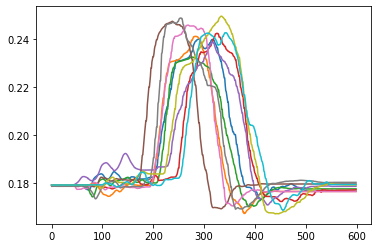

In [2]:
#List to store demonstraitons
Signals=[]

#Signal Index
file_id=[0,1,2,3,4,5,6,7,8,9]
filename = './Signals/signal_'
              
N=599
time = np.linspace(0, N, num=N)
#Open each file
for f_id in file_id:
    #List to store temporaly the data of each file
    Dem_i=[]
    #Concatenate file name to be opened
    file_name=filename+str(f_id)+'.txt'
    data = np.loadtxt(file_name, delimiter=' ', skiprows=1, dtype=str)
    Signals.append(np.asarray(data)[:,2].transpose())
Signals=np.asarray(Signals).astype(np.float32)

# Plots
fig = plt.figure(1)
for i in range(Signals.shape[0]):
    plt.plot(time,Signals[i,:])
print(Signals.shape)

# Task_1: DTW Matrix

Implement a function to get the DTW matrix

<div>
<img src="./DTW_Matrix.png" width="800"/>
</div>



In [3]:

#Implement your code here

def DTW_Matrix(signal_1,signal_2):
    n = len(signal_1)
    m = len(signal_2)
    M=np.zeros([n,m])
    for i in range(0,2*max(n,m)):
        for j in range(0,i+1):
            r = i - j
            c = j
            if r >= n or r < 0 or c >= m or c < 0:
                continue
            x = M[r-1,c] if r > 0 else signal_2[c]
            y = M[r,c-1] if c > 0 else signal_1[r]
            z = M[r-1,c-1] if r > 0 and c > 0 else signal_1[r-1] if r > 0 else signal_2[c-1] if c > 0 else 0
            M[r,c] = abs(signal_1[r] - signal_2[c]) + min(x,y,z)

    return M

#print(DTW_Matrix(Signals[0,:],Signals[1,:]))



# Task_2: Final Distance Calculation

Implement the warping path function to calculate the final Distance



<div>
<img src="./DTW_Path.png" width="800"/>
</div>

<div>
<img src="./DTW_distance.png" width="800"/>
</div>

In [4]:
#Implement your code here
def DTW_distance(M):
    # M is the DTW Matrix

    (n,m) = np.shape(M)
    (r,c) = (n-1, m-1) 
    min_cost_path = []
    min_cost_path.append(M[r,c])
    while (r,c) != (0,0):
        ngbrs = []
        if r > 0:
            (nr,nc) = (r-1,c)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if c > 0:
            (nr,nc) = (r,c-1)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if r > 0 and c > 0:
            (nr,nc) = (r-1,c-1)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if len(ngbrs) == 0:
            print("error: no value found")
            return -1
        (m,nr,nc) = ngbrs[0]
        for (n,x,y) in ngbrs:
            if n < m:
                (m,nr,nc) = (n,x,y)
        min_cost_path.append(m)
        (r,c) = (nr,nc)
    
    d = np.average(min_cost_path)
    
    #d is a float that inicates the similarity between two signals
    
    return d


# Task 3: DTW alignment

Implement a function to compensate the shift between two signals using DTW
* Use the DTW_Matrix function from task 1

<div>
<img src="./DTW_alignment.png" width="800"/>
</div>

In [5]:

def DTW_alignment(signal_1,signal_2):
    
    M = DTW_Matrix(signal_1, signal_2)
    
    (n,m) = np.shape(M)
    (r,c) = (n-1, m-1) 
    min_cost_path = []
    min_cost_path.append((r,c))
    while (r,c) != (0,0):
        ngbrs = []
        if r > 0:
            (nr,nc) = (r-1,c)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if c > 0:
            (nr,nc) = (r,c-1)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if r > 0 and c > 0:
            (nr,nc) = (r-1,c-1)
            m = M[nr,nc]
            ngbrs.append((m,nr,nc))
        if len(ngbrs) == 0:
            print("error: no value found")
            return -1
        (m,nr,nc) = ngbrs[0]
        for (n,x,y) in ngbrs:
            if n < m:
                (m,nr,nc) = (n,x,y)
        min_cost_path.insert(0, (nr,nc))
        (r,c) = (nr,nc)
    
    New_signal_1 = []
    New_signal_2 = []
    
    for (i,j) in min_cost_path:
        New_signal_1.append(signal_1[i])
        New_signal_2.append(signal_2[j])
        
    return New_signal_1, New_signal_2

# Task 4: Test the functions "DTW_Matrix" and "DTW_distance"
- Calculate the similarity metric between the signals provided in the first cells (Signals) using the DTW_distance of task 2
- Use "Signals[0,:]" as signal reference
- Store the similarity value in the list "similarity"

similarity= [0.24670912010411336, 0.34309190877520285, 0.1528668532218145, 0.2935484200879948, 0.36787581848093565, 0.3205108485271021, 0.5018756539139264, 0.38325670208522983, 0.223140669858077]


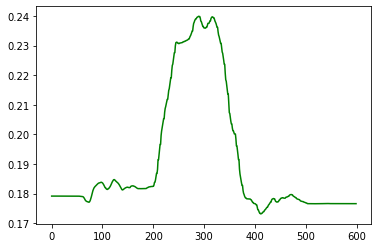

In [6]:

Signal_Reference=Signals[0,:]
plt.plot(time,Signal_Reference,'g')
similarity=[]
for i in [1,2,3,4,5,6,7,8,9]:
    #Implement your code here
    M = DTW_Matrix(Signal_Reference, Signals[i,:])
    similarity.append(DTW_distance(M))
print("similarity=",similarity)

#  Task 5: Plot the aligned signals 
Use the DTW_alignment function from task 3 to plot the aligned signals. Rember to use "Signals[0,:]" as reference.

**Make sure to indicate in the plot which one is the reference.**


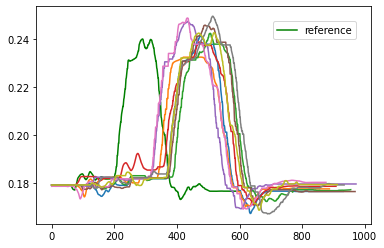

In [7]:
Signal_Reference=Signals[0,:]
plt.plot(time,Signal_Reference,'g', label='reference')
for i in range(1,Signals.shape[0]):
    #Implement your code here
    (ns1, ns2) = DTW_alignment(Signal_Reference, Signals[i,:])
    ntime = arange(0, len(ns1))
    plt.plot(ntime, ns2)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=1.5)
